In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузите данные о красном вине

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

# Проверьте на наличие недостающих данных (достаточно проверить на наличие пропусков)

In [3]:
df.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Преобразуйте метки к бинарным классам считая, что «хорошее» вино имеет качество 6 и выше. Для этого необходимо добавить в датафрейм новый столбец с бинарными классами 0,1.

In [4]:
df['binary_class'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0) 

# Найдите количество выбросов по столбцу Качество. Для этого найдите точки данных с экстремально высокими или низкими значениями; рассчитайте 25-й и 75-й процентили; вычислите диапазон выбросов, используя межквартильный диапазон 1,5 * (Q3 - Q1) 

In [5]:
# Считаем 25 и 75 процентиль
Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Считаем количество выбросов
outliers = df[(df['quality'] < lower_bound) | (df['quality'] > upper_bound)].shape[0]

# Вывод количества выбросов
print("Количество выбросов: {}".format(outliers))

#Удалите найденные выбросы. Сделаем новый dataframe без выбросов. 
df_without_outliers = df[(df['quality'] > lower_bound) & (df['quality'] < upper_bound)]
df_without_outliers = df_without_outliers.reset_index(drop=True)
df_without_outliers

Количество выбросов: 28


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1567,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1568,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1569,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


# Постройте график распределения по Качеству. 

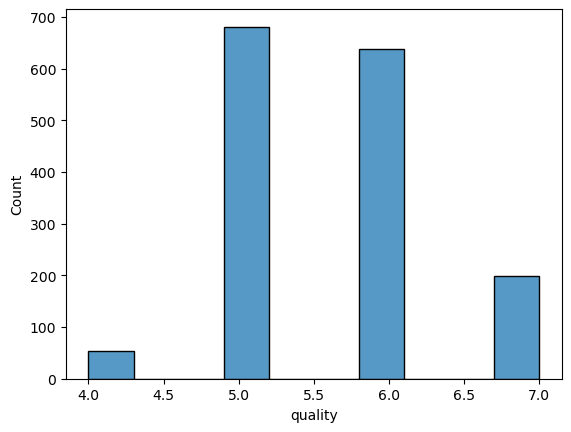

In [6]:
sns.histplot(df_without_outliers['quality'], kde=False, bins=10) #disploit устарело, поэтому испльзую histplot.
plt.show()

# Постройте график и определите по нему баланс бинарных классов, используя бинарные метки

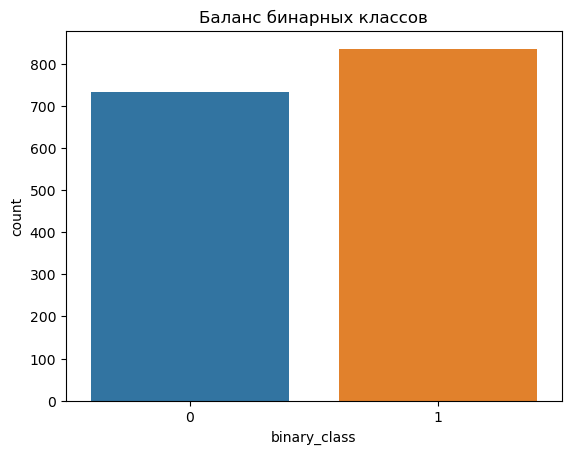

Баланс бинарных классов 0.5327816677275621
Процент 1 = 53.27816677275621%
Процент 0 = 46.72183322724379%


In [7]:
sns.countplot(x=df_without_outliers['binary_class']) 
plt.title('Баланс бинарных классов') 

# Переменная с балансом
balance = sum(df_without_outliers['binary_class']) / len(df_without_outliers['binary_class'])

plt.show()
# Вывод баланса
print("Баланс бинарных классов {}".format(balance))

total = df_without_outliers['binary_class'].count()
ones = df_without_outliers['binary_class'].sum()
percentage_ones = ones / total * 100
percentage_zeros = (total - ones) / total * 100

print("Процент 1 = {}%".format(percentage_ones))
print("Процент 0 = {}%".format(percentage_zeros))

# Найдите медиану по каждому признаку 

In [8]:
df_without_outliers.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
binary_class             1.00000
dtype: float64

# Постройте график “ящик с усами” по показателю качества

<AxesSubplot:>

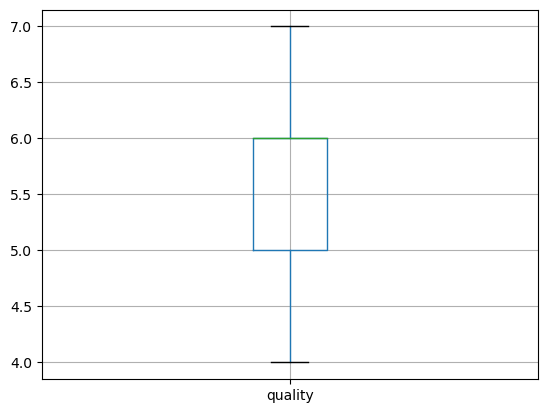

In [9]:
df_without_outliers.boxplot(column='quality')

# Постройте графики распределений значений каждого из 12 признаков

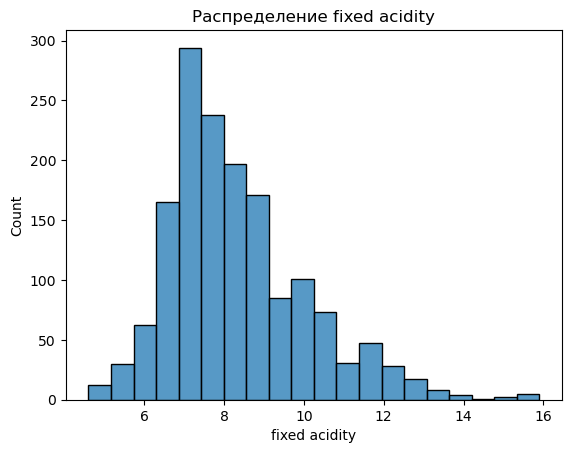

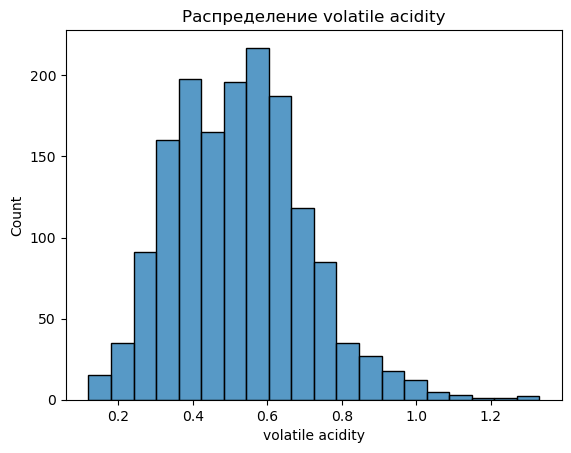

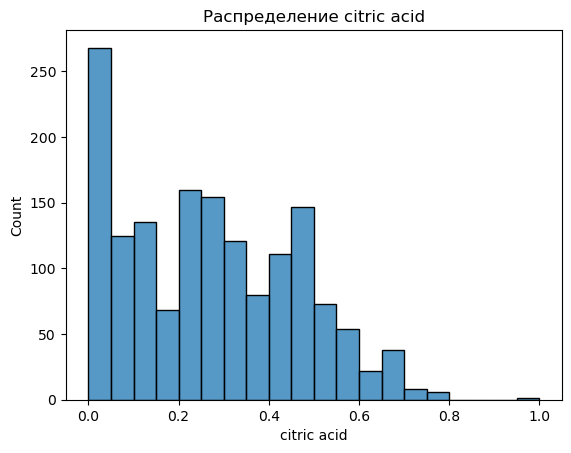

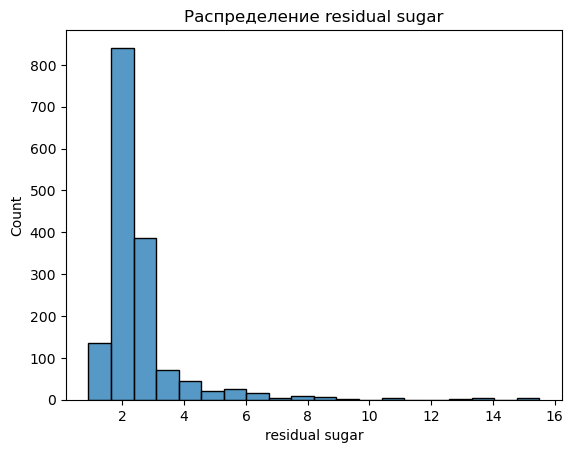

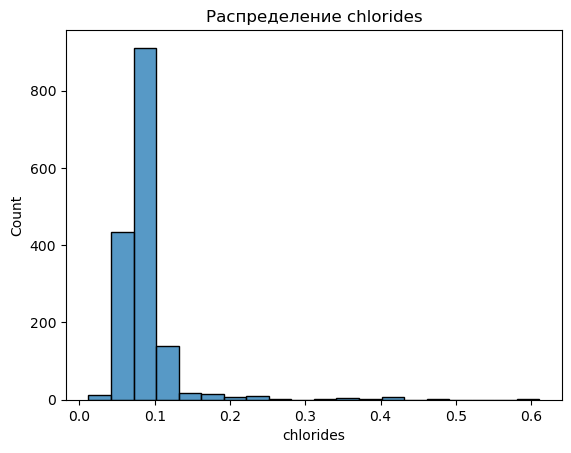

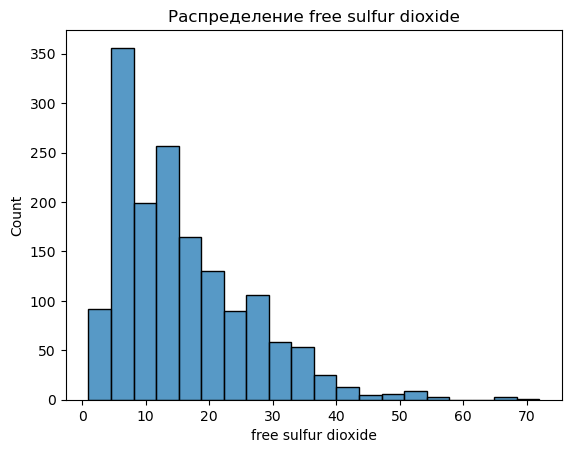

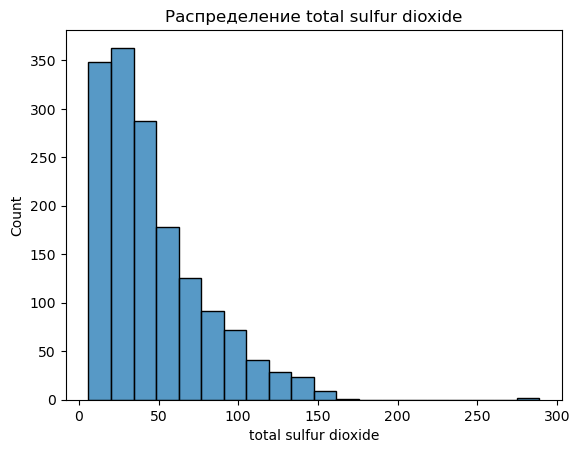

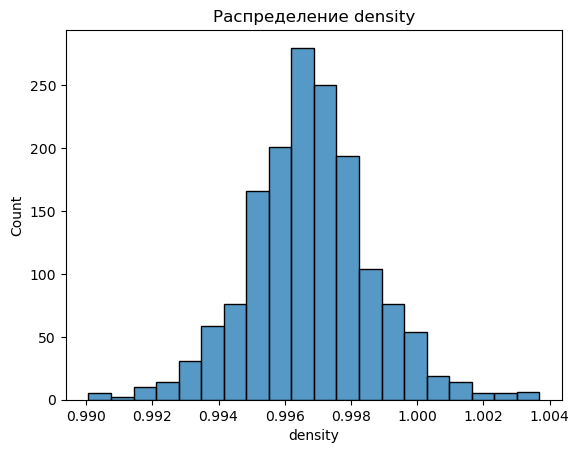

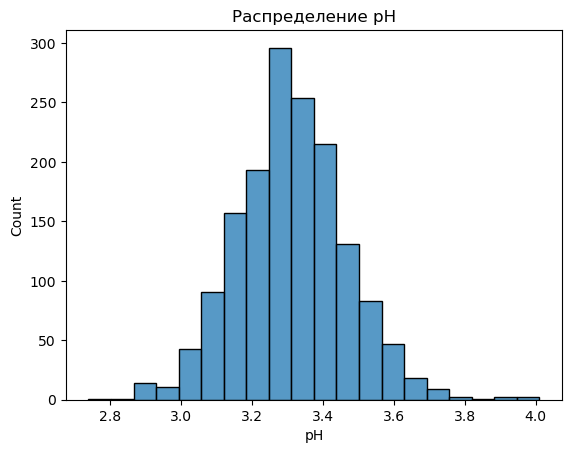

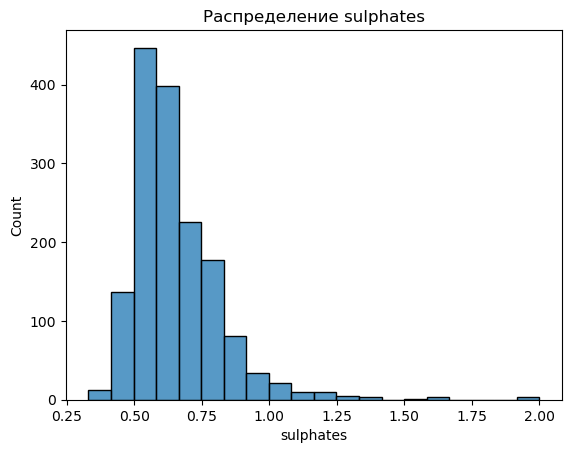

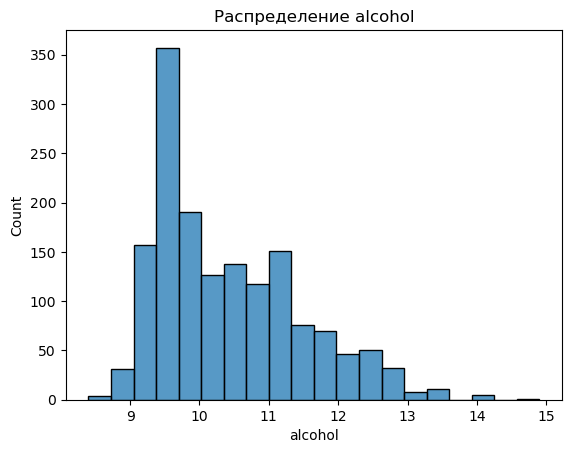

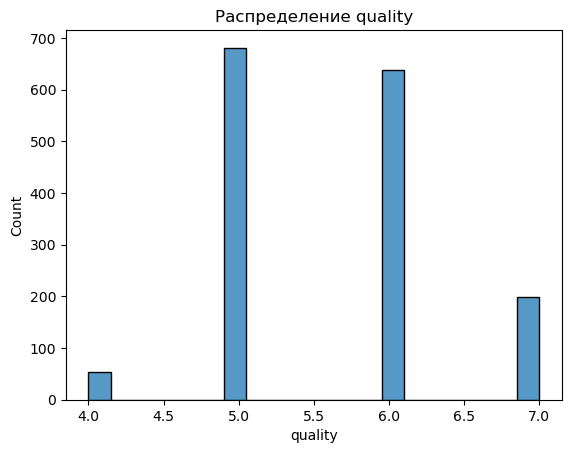

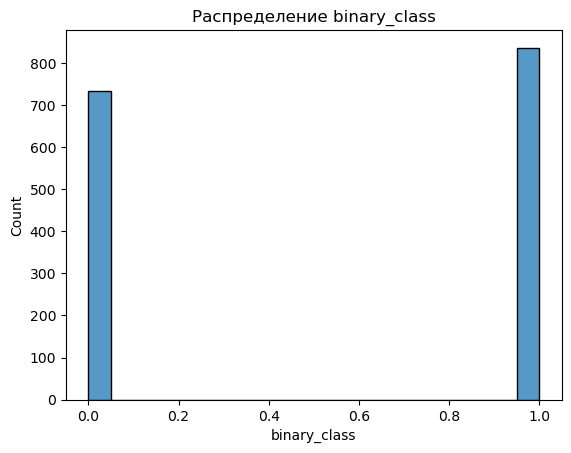

In [10]:
for col in df_without_outliers.columns:
    sns.histplot(df_without_outliers[col], kde=False, bins=20)
    plt.title(f'Распределение {col}')
    plt.show()

# Постройте матрицу корреляции между признаками 

<AxesSubplot:>

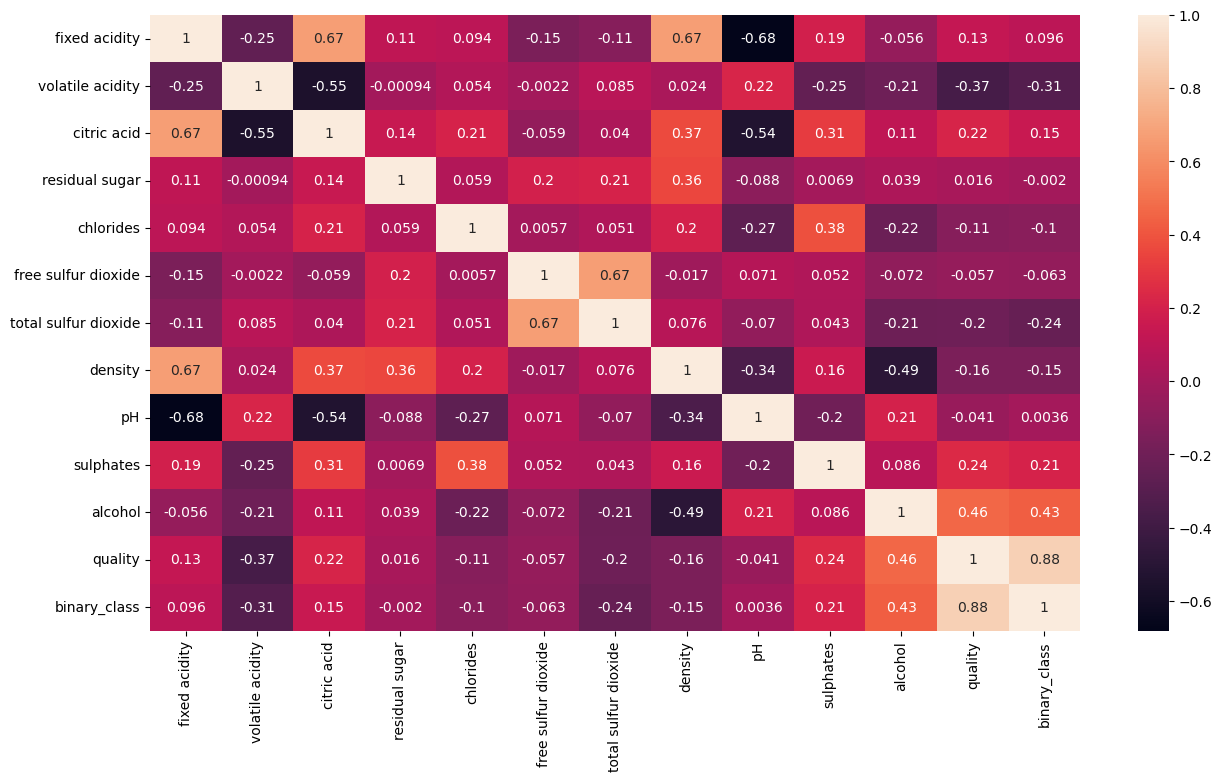

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df_without_outliers.corr(), annot=True)